# FACTORS THAT INFLUENCE THE LENGTH OF GOBIKE TRIPS 
## by Johnpaul Kosisochukwu Nwagwu


## Investigation Overview


> In this Investigation I was to investigation factors that affect the length of a trip duration. The main focus was on the trip days, user types, trip hours and if trip was shared or not.

## Dataset Overview

> The Ford GoBike Dataset contains approximately 183,000 entries of individual rides made in a bike sharing system in Greater SanFrancisco Bay area in February 2019. The data set can be found here https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv. We will explore important features such as duration_sec, start_hour, end_hour, member_gender, user_type and start_dayname among others. Some of these features were extracted from existing variables. Data Wrangling performed include Change start time to date time type and split to day, dayname, month and year columns and Change end time to date time type and split to day, dayname, month and year columns

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [19]:
#Change start time to date time type and split to day, month and year columns
gobike['start_time'] = pd.to_datetime(gobike['start_time'])

gobike['start_day'] = gobike.start_time.dt.day
gobike['start_dayname'] = gobike.start_time.dt.day_name()
gobike['start_month'] = gobike.start_time.dt.month
gobike['start_year'] = gobike.start_time.dt.year

In [20]:
order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
gobike['start_dayname'] = pd.Categorical(gobike['start_dayname'], categories=order, ordered=True)

In [21]:
#Change end time to date time type and split to day, month and year columns
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

gobike['end_day'] = gobike.end_time.dt.day
gobike['end_dayname'] = gobike.end_time.dt.day_name()
gobike['end_dayname'] = pd.Categorical(gobike['end_dayname'], categories=order, ordered=True)
gobike['end_month'] = gobike.end_time.dt.month
gobike['end_year'] = gobike.end_time.dt.year

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## DISTRIBUTION OF TRIP LENGTHS

> The distribution of the trip duration is right skewed with most trips lasting between about 300 to 700 seconds. There also appears to trip lengths are big as 80,000 seconds


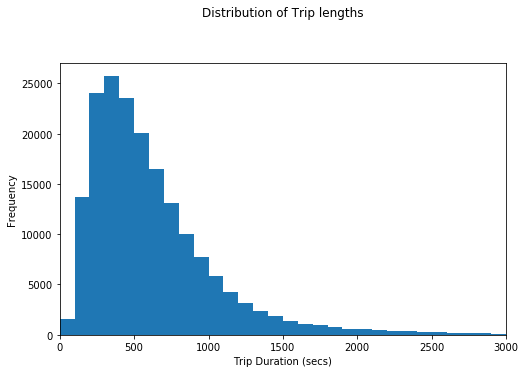

In [22]:
binsize = 100
bins = np.arange(0, gobike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip lengths',  y=1.15)
plt.xlim([0,3000])
plt.show()

## DISTRIBUTION OF TRIPS BY DAYS

> Most trips were made on thursdays with over 35000 trips with the least trip of about 15,000 made on weekends(Saturdays and Sundays)

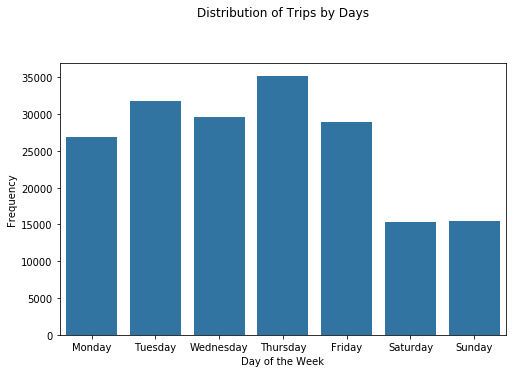

In [23]:
#Looking at start day names 
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]

ax = sb.countplot(data = gobike, x = 'start_dayname', color = default_color)
ax.set_title('Distribution of Trips by Days', y=1.15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Day of the Week');

## DISTRIBUTION OF TRIPS BY USER TYPES

> More than 80% of users in our data are subscribers. We have over 160,000 susbcribers abnd about 20,000 customers

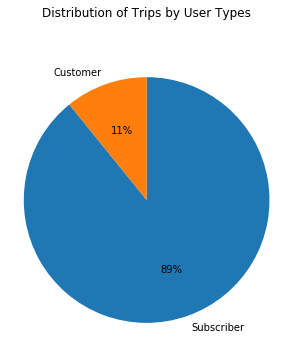

In [24]:
#Next, Let us look at the user type distribution
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
user_frequency = gobike['user_type'].value_counts()
user_order = user_frequency.index
plt.pie(user_frequency, labels=user_order, autopct='%1.0f%%', startangle = 90, counterclock = False)
plt.axis('square');
plt.title('Distribution of Trips by User Types', y=1.15);

## DISTRIBUTION OF TRIP HOURS

> We see that the top 5 Most travelled hours are 17:00, 8:00, 18:00, 9:00 and 16:00. These are work trip times. Also, the least trips are taken in the early hours of the morning and midnight.

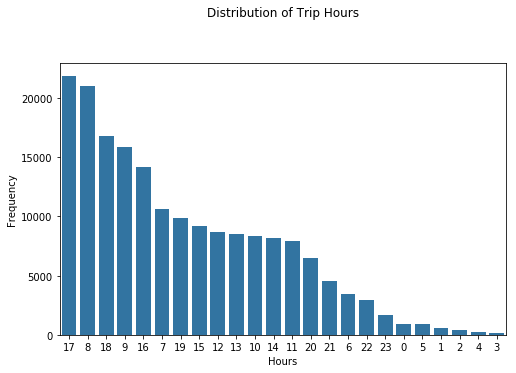

In [25]:
#extracting trip start time and end time hours
gobike['start_hour'] = gobike['start_time'].dt.hour
gobike['end_hour'] = gobike['end_time'].dt.hour

#Plotting their distributions
starthour_frequency = gobike['start_hour'].value_counts()
starthour_order = starthour_frequency.index

plt.figure(figsize=[8, 5])
sb.countplot(data = gobike, x = 'start_hour', color = default_color, order=starthour_order)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Hours',  y=1.15)
plt.show()


## DISTRIBUTION OF TRIP TYPES

> We can see that about 90% of trips were individual trips(not shared)

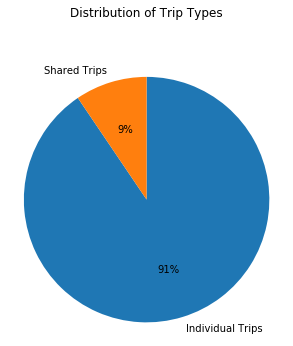

In [26]:
#Distribution of Bike share for all trip
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
user_frequency = gobike['bike_share_for_all_trip'].value_counts()
user_order = user_frequency.index
plt.pie(user_frequency, labels=['Individual Trips','Shared Trips'], autopct='%1.0f%%', startangle = 90, counterclock = False)
plt.axis('square');
plt.title('Distribution of Trip Types', y=1.15);

##  BIKE SHARE FOR ALL TRIPS VS USER TYPES

> We can see that all shared trips are by Suscribers only. No customer shared a trip

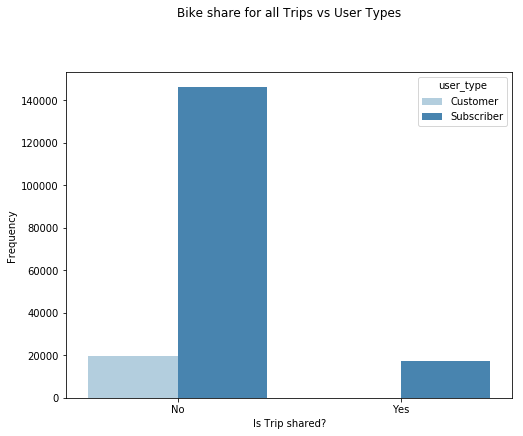

In [27]:
# Next, we evaluate categorical vs categorical variables
plt.figure(figsize = [8, 6])

#bike_share_for_all_trip vs user_type

sb.countplot(data = gobike, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Blues');
plt.xlabel('Is Trip shared?')
plt.ylabel('Frequency')
plt.title('Bike share for all Trips vs User Types',  y=1.15);

##  BIKE SHARE FOR ALL TRIPS VS USER TYPES

> So in general for hours between 4:00 and 21:00, The Customers spend more time travelling than the subscribers with the peak travel time being between 11:00 and 15:00 and less than 1100 seconds. The Suscribers peak travel duration is almost constant at about 600 seconds

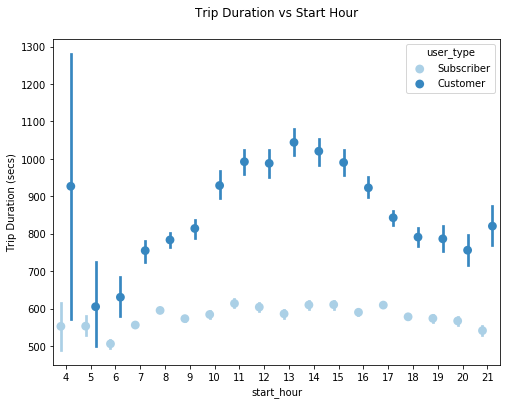

In [28]:
# Next let us explore these hours a bit,  select trips duration less than 3000 and start hour greater than 6
gobike2 = (gobike['duration_sec'] <= 3000) & (gobike['start_hour'].between(4,21))
gobike21 = gobike.loc[gobike2,:]

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = gobike21, x = 'start_hour', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration vs Start Hour',  y=1.05)
plt.ylabel('Trip Duration (secs)')
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slides.ipynb to slides
[NbConvertApp] Writing 397979 bytes to Part_II_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slides.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/b

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


## THE END. HAVE A GREAT DAY